# Meng Wang Lab - Single Cell Atlas

https://agingc.shinyapps.io/AgingC_expression/

https://www.nature.com/articles/s43587-024-00631-1



In [ ]:
%%time
# The data was converted to h5ad from R seurat
# The conversion steps are in the Appendix below if needed
import anndata as ad
print(f"anndata version {ad.__version__}")
adata = ad.read_h5ad("../source_data/wang_lab/seurat_obj.h5ad")
adata

anndata version 0.11.4
CPU times: user 13 s, sys: 1.52 s, total: 14.5 s
Wall time: 16.2 s


AnnData object with n_obs × n_vars = 241969 × 26603
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'genotype', 'cb', 'singlelet', 'integrated_snn_res.0.5', 'integrated_snn_res.0.8', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'seurat_clusters', 'tissue'
    var: 'features'
    obsm: 'X_tsne', 'X_umap'

In [2]:
# What is the obs / Observation Variable?
# The observation dataframe gives us the tissue data and the genotypes
obs_df = adata.obs
obs_df


,orig.ident,nCount_RNA,nFeature_RNA,genotype,cb,singlelet,integrated_snn_res.0.5,integrated_snn_res.0.8,integrated_snn_res.1,integrated_snn_res.1.2,integrated_snn_res.1.5,seurat_clusters,tissue
LIPL4D1_AAACCCAAGGGTAATT-1,LIPL4D1,777.0,560,LIPL4D1,LIPL4D1_AAACCCAAGGGTAATT-1,1,1,2,12,12,64,2,Embroynic_cells
LIPL4D1_AAACCCACAGAGAGGG-1,LIPL4D1,1234.0,617,LIPL4D1,LIPL4D1_AAACCCACAGAGAGGG-1,1,34,7,7,7,3,7,Hypodermis
LIPL4D1_AAACCCACAGATCCAT-1,LIPL4D1,4609.0,2556,LIPL4D1,LIPL4D1_AAACCCACAGATCCAT-1,1,39,5,56,4,13,5,Germline
LIPL4D1_AAACCCAGTATACCTG-1,LIPL4D1,733.0,444,LIPL4D1,LIPL4D1_AAACCCAGTATACCTG-1,1,34,7,7,7,3,7,Hypodermis
LIPL4D1_AAACCCATCCGCGGAT-1,LIPL4D1,1226.0,719,LIPL4D1,LIPL4D1_AAACCCATCCGCGGAT-1,1,34,7,7,7,3,7,Hypodermis
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RSKS1D12_TTTGTTGTCATGGAGG-1,RSKS1D12,268.0,236,RSKS1D12,RSKS1D12_TTTGTTGTCATGGAGG-1,1,0,1,0,0,12,1,Germline
RSKS1D12_TTTGTTGTCCGGGACT-1,RSKS1D12,400.0,336,RSKS1D12,RSKS1D12_TTTGTTGTCCGGGACT-1,1,0,0,1,0,0,0,Germline
RSKS1D12_TTTGTTGTCCTTATAC-1,RSKS1D12,292.0,263,RSKS1D12,RSKS1D12_TTTGTTGTCCTTATAC-1,1,1,2,12,12,56,2,Embroynic_cells
RSKS1D12_TTTGTTGTCGTCCATC-1,RSKS1D12,303.0,254,RSKS1D12,RSKS1D12_TTTGTTGTCGTCCATC-1,1,0,0,1,0,0,0,Germline


In [3]:
# How many uniques Genotypes are in the data set?
# The results align with the paper (As expected but good to see.)

genotypes = obs_df['genotype'].value_counts().sort_values(ascending=False).sort_index()
genotypes_formatted = genotypes.map(lambda x: f"{x:,}")
print(genotypes_formatted)


genotype
BWD1          9,579
BWD6         10,268
DAF2D1       13,167
DAF2D12      10,250
DAF2D6        9,038
DLOND1        9,657
DLOND6        8,691
LIPL4D1       8,952
LIPL4D12      3,846
LIPL4D6      15,991
N2D1         22,962
N2D12        23,100
N2D14         7,450
N2D1early    10,788
N2D6         27,688
N2HTD1       10,964
N2HTD5        5,049
RSKS1D1      12,883
RSKS1D12     14,651
RSKS1D6       6,995
Name: count, dtype: object


#### Genotypes Used in the Shiny App and available counts in the paper

🔗 [AgingC Expression Viewer](https://agingc.shinyapps.io/AgingC_expression/)

| Genotype          | Code     | Count   |
|-------------------|----------|---------|
| rsks-1(lf) D12    | RSKS1D12 | 14,651  |
| rsks-1(lf) D6     | RSKS1D6  | 6,995   |
| rsks-1(lf) D1     | RSKS1D1  | 12,883  |
| daf-2(lf) D12     | DAF2D12  | 10,250  |
| daf-2(lf) D6      | DAF2D6   | 9,038   |
| daf-2(lf) D1      | DAF2D1   | 13,167  |
| lipl-4 Tg D12     | LIPL4D12 | 3,846   |
| lipl-4 Tg D6      | LIPL4D6  | 15,991  |
| lipl-4 Tg D1      | LIPL4D1  | 8,952   |
| WT D14            | N2D14    | 7,450   |
| WT D12            | N2D12    | 23,100  |
| WT D6             | N2D6     | 27,688  |
| WT D1             | N2D1     | 22,962  |

In [4]:
# Let's look more closely at the tissues
# How many different tissues types?
# What are the counts for each?

# Again and as expected we align with the paper

tissues = obs_df['tissue'].value_counts().sort_values(ascending=False).sort_index()
tissue_formatted = tissues.map(lambda x: f"{x:,}")
print(tissue_formatted)


tissue
ARSC                              7,872
Coelomocyte                       2,549
Embroynic_cells                  31,078
Excretory_gland_cell_and_DTC        491
Germline                        137,610
Glia                                288
Gonadal_sheath_cell               1,729
Hypodermis                       18,540
Intestine                         6,782
Muscle                           11,445
Neuron                           11,180
Pharynx                           3,125
Spermatheca                       1,936
Sperms                            2,966
Uterine_seam_cell                   643
Vulva_uterus                      3,703
singleton                            32
Name: count, dtype: object


In [5]:
# adata.X provides the expression data for each observation

# One thing that is unclear is what does the actually expression value represents (Fold Change, Log Fold Change)?

import pandas as pd
from scipy.sparse import csr_matrix

x_df = pd.DataFrame(data=csr_matrix.todense(adata.X))
print(f"{x_df.shape=}")
# There are 241,969 Rows (observations) and 26,603 Columns (Genes)
x_df

x_df.shape=(241969, 26603)


,0,1,2,3,4,5,6,7,8,9,...,26593,26594,26595,26596,26597,26598,26599,26600,26601,26602
0,3.286162,0.0,0.000000,2.629729,2.629729,3.679083,2.629729,3.286162,0.0,4.179758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,2.208684,0.000000,2.208684,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.153627,0.0,1.675101,0.000000,1.153627,1.153627,1.675101,2.016103,0.0,1.675101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.000000,2.683933,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.851470,0.0,3.515312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241964,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.645801,0.000000,0.0,3.645801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241965,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241966,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241967,0.000000,0.0,3.526458,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
count = x_df.iloc[0].sum()
print(count)

1573.2715570963805


In [6]:
# Let's take a closer look at the expression values captured in this dataframe

has_nans = x_df.isnull().values.any()
print("Contains NaNs:", has_nans)
has_negatives = (x_df < 0).values.any()
print("Contains negative values:", has_negatives)
max_value = x_df.to_numpy().max()
print("Maximum value in the DataFrame:", max_value)

Contains NaNs: False
Contains negative values: False
Maximum value in the DataFrame: 9.143274052756087


In [7]:
# Let's look at the adata.var
# var contain the features which are a combination of Gene_Name and Sequence IDs
 
var_df = adata.var
var_df.head()

,features
nduo-6,nduo-6
ndfl-4,ndfl-4
MTCE.7,MTCE.7
nduo-1,nduo-1
atp-6,atp-6


-----

In [11]:
# Let's get the Wormbase ID associated with the features in var_df

# The RAW DATA GSM7147953_N2D1_GZ/features.tsv.gz contains
# The features and there associated Wormbase_Ids

# The order aligns with the column names in x_df

# https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE229022

import pandas as pd

def get_wormbase_ids_as_features(adata, features_file_path: str= "../source_data/wang_lab/GSE229022_RAW/GSM7147953_N2D1_features.tsv.gz") -> pd.DataFrame:
    """
    Loads Wormbase IDs from a compressed features file and merges them into adata.var.

    """
    # Load features.tsv.gz with Wormbase IDs
    features_n2d1_df = pd.read_csv(
        features_file_path,
        sep="\t",
        header=None,
        compression='infer',
        names=['Wormbase_Id', 'features', 'Expression']
    ).set_index('features').drop(columns=['Expression'])

    # Copy adata.var and add position index
    features_df = adata.var.copy()
    features_df['position'] = range(len(features_df))

    # Merge to get Wormbase_Id aligned with adata.var index
    wormbase_ids_as_features = features_df.merge(
        features_n2d1_df,
        how='left',
        left_index=True,
        right_index=True
    )

    # Fill in missing Wormbase IDs with the index name
    wormbase_ids_as_features['Wormbase_Id'] = wormbase_ids_as_features['Wormbase_Id'].fillna(
        pd.Series(wormbase_ids_as_features.index, index=wormbase_ids_as_features.index)
    )

    # Sanity check (optional logging)
    print(wormbase_ids_as_features.head())
    print(f"{len(wormbase_ids_as_features):,}")
    print("All Wormbase_Id values are unique:", wormbase_ids_as_features['Wormbase_Id'].is_unique)

    return wormbase_ids_as_features

In [12]:
def extract_genotype_expression_df(
    genotype: str,
    wormbase_ids_as_features: pd.DataFrame,
    obs_df: pd.DataFrame,
    x_df: pd.DataFrame,
) -> pd.DataFrame:
    """
    Extract a gene expression DataFrame for a specific genotype from an AnnData object.

    """
    # Boolean mask for selected genotype
    genotype_mask = obs_df['genotype'] == genotype

    # Extract and label expression data
    x_genotype_df = x_df[genotype_mask.values].copy()
    
    # Apply Wormbase Ids to Columns
    x_genotype_df.columns = wormbase_ids_as_features['Wormbase_Id'].tolist()
    
    print(f"{x_genotype_df.shape=}")

    # Add tissue column from adata.obs
    x_genotype_df['tissue'] = obs_df.loc[genotype_mask, 'tissue'].values
    print(f"{x_genotype_df.shape=}")

    return x_genotype_df


In [13]:
wormbase_ids_as_features = get_wormbase_ids_as_features(adata)
x_n2d1_df = extract_genotype_expression_df("N2D1", wormbase_ids_as_features, obs_df=adata.obs, x_df=x_df)
x_n2d1_df

       features  position     Wormbase_Id
nduo-6   nduo-6         0  WBGene00010957
ndfl-4   ndfl-4         1  WBGene00010958
MTCE.7   MTCE.7         2  WBGene00014454
nduo-1   nduo-1         3  WBGene00010959
atp-6     atp-6         4  WBGene00010960
26,603
All Wormbase_Id values are unique: True
x_genotype_df.shape=(22962, 26603)
x_genotype_df.shape=(22962, 26604)


,WBGene00010957,WBGene00010958,WBGene00014454,WBGene00010959,WBGene00010960,WBGene00010961,WBGene00000829,WBGene00010962,WBGene00010963,WBGene00010964,...,WBGene00197293,WBGene00011169,WBGene00219290,WBGene00196580,WBGene00199071,WBGene00199862,WBGene00200586,WBGene00196067,WBGene00195949,tissue
8952,1.723490,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.723490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Vulva_uterus
8953,0.000000,0.0,0.000000,0.000000,1.524587,0.0,0.000000,2.102485,1.524587,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Germline
8954,0.892376,0.0,0.892376,0.892376,1.911568,0.0,1.356310,1.671993,0.000000,1.911568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Germline
8955,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2.765120,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Germline
8956,0.000000,0.0,0.000000,0.000000,1.189107,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Germline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178754,2.465066,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.465066,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Germline
178755,1.742663,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Germline
178756,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Germline
178757,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.795519,0.000000,0.000000,2.776818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Muscle


In [14]:
# How many tissue specific Observations are there for Day 1 WT Worms

print(f"Day 1 WT Tissue totals {x_n2d1_df['tissue'].value_counts().sum():,}")
n2d1_tissues = x_n2d1_df['tissue'].value_counts().sort_values(ascending=False).sort_index()
n2d1_tissue_formatted = n2d1_tissues.map(lambda x: f"{x:,}")
print(n2d1_tissue_formatted)

# Sum 22,962


Day 1 WT Tissue totals 22,962
tissue
ARSC                               140
Coelomocyte                        119
Embroynic_cells                  2,522
Excretory_gland_cell_and_DTC        43
Germline                        15,116
Glia                                24
Gonadal_sheath_cell                251
Hypodermis                       1,692
Intestine                          568
Muscle                             877
Neuron                             626
Pharynx                            223
Spermatheca                        348
Sperms                              40
Uterine_seam_cell                   44
Vulva_uterus                       327
singleton                            2
Name: count, dtype: object


# Trial Run

In [15]:
# Choose a Random Gene
wormbase_id = 'WBGene00015329'
gene_data = x_n2d1_df[wormbase_id]
matching_row = wormbase_ids_as_features[wormbase_ids_as_features['Wormbase_Id'] == wormbase_id]
print(matching_row)

          features  position     Wormbase_Id
C02B10.4  C02B10.4       942  WBGene00015329


In [16]:
# For a given Gene Id get all the expression data for Day 1 Wild Type Worms
# broken down by tissue type
tissue_types = ["ARSC", "Coelomocyte", "Embroynic_cells", "Excretory_gland_cell_and_DTC", "Germline", "Glia", "Gonadal_sheath_cell", "Hypodermis", "Intestine", "Muscle", "Neuron", "Pharynx", "Spermatheca", "Sperms", "Uterine_seam_cell", "Vulva_uterus", "singleton"]

for tissue_type in tissue_types:
    tissue_data = x_n2d1_df.loc[x_n2d1_df['tissue'] == tissue_type, wormbase_id]
    print(tissue_type)
    print(list(tissue_data))
    print()
    print(f"Sum of squares { (tissue_data ** 2).sum() }")
    print(f"Avg {(tissue_data ** 2).sum()/len(tissue_data)}")
    print(f"Count {len(tissue_data)}")
    print(f"Count > 0 {sum(tissue_data > 0)}")
    print("="*40)

ARSC
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.952241111989178, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4076692207046242, 2.352778829711831, 0.0, 0.0, 1.0711209308034144, 2.859188830459477, 0.0, 0.0, 0.9595667911472827, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9224531167457548, 0.0, 2.190497399941729, 0.0, 0.0, 0.0, 0.0, 2.6826625241222586, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.058039274986751, 2.0140368446544157, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0658240885291517, 0.0, 0.0, 0.0, 0.0, 2.851470007825611, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7118617553294966, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6357209039067135, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.187758624267677, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6321208856186016, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2492029789755144, 0.0, 0.4687843586373101]

Sum of squares 

In [30]:
sum_expr_by_tissue = x_n2d1_df.groupby('tissue')[wormbase_id].sum()
sum_expr_by_tissue = sum_expr_by_tissue.sort_index()
print(len(x_n2d1_df))
sum_expr_by_tissue

22962


tissue
ARSC                              37.272998
Coelomocyte                       22.954828
Embroynic_cells                  505.413564
Excretory_gland_cell_and_DTC       4.501854
Germline                        6042.899080
Glia                               4.301590
Gonadal_sheath_cell               44.439042
Hypodermis                       151.160142
Intestine                         51.301015
Muscle                            91.258158
Neuron                            89.180299
Pharynx                           30.637532
Spermatheca                       67.209492
Sperms                             4.651181
Uterine_seam_cell                  6.667613
Vulva_uterus                      31.885308
singleton                          4.349648
Name: WBGene00015329, dtype: float64

In [18]:
avg_expr_by_tissue = x_n2d1_df.groupby('tissue')[wormbase_id].mean()
avg_expr_by_tissue = avg_expr_by_tissue.sort_index()
avg_expr_by_tissue

tissue
ARSC                            0.266236
Coelomocyte                     0.192898
Embroynic_cells                 0.200402
Excretory_gland_cell_and_DTC    0.104694
Germline                        0.399768
Glia                            0.179233
Gonadal_sheath_cell             0.177048
Hypodermis                      0.089338
Intestine                       0.090319
Muscle                          0.104057
Neuron                          0.142461
Pharynx                         0.137388
Spermatheca                     0.193131
Sperms                          0.116280
Uterine_seam_cell               0.151537
Vulva_uterus                    0.097509
singleton                       2.174824
Name: WBGene00015329, dtype: float64

In [19]:
# Boolean mask for expression > 0
is_expressed = x_n2d1_df[wormbase_id] > 0

# Calculate percentage per tissue
percent_expressed_by_tissue = (
    is_expressed.groupby(x_n2d1_df['tissue']).sum()
)
percent_expressed_by_tissue = percent_expressed_by_tissue.sort_index()
percent_expressed_by_tissue

tissue
ARSC                              19
Coelomocyte                        9
Embroynic_cells                  238
Excretory_gland_cell_and_DTC       2
Germline                        3262
Glia                               2
Gonadal_sheath_cell               33
Hypodermis                        91
Intestine                         46
Muscle                            47
Neuron                            47
Pharynx                           18
Spermatheca                       41
Sperms                             2
Uterine_seam_cell                  4
Vulva_uterus                      19
singleton                          2
Name: WBGene00015329, dtype: int64

In [31]:
# Calculate the the Percentage Cells with Expression
# The result should match the Shiny App

# Boolean mask for expression > 0
is_expressed = x_n2d1_df[wormbase_id] > 0
print(len(is_expressed))
#print(is_expressed.head())
# Calculate percentage per tissue
percent_expressed_by_tissue = (
    is_expressed.groupby(x_n2d1_df['tissue']).mean() * 100
).round(2)

percent_expressed_by_tissue = percent_expressed_by_tissue.sort_index()
percent_expressed_by_tissue

22962


tissue
ARSC                             13.57
Coelomocyte                       7.56
Embroynic_cells                   9.44
Excretory_gland_cell_and_DTC      4.65
Germline                         21.58
Glia                              8.33
Gonadal_sheath_cell              13.15
Hypodermis                        5.38
Intestine                         8.10
Muscle                            5.36
Neuron                            7.51
Pharynx                           8.07
Spermatheca                      11.78
Sperms                            5.00
Uterine_seam_cell                 9.09
Vulva_uterus                      5.81
singleton                       100.00
Name: WBGene00015329, dtype: float64

# Create the UMAP

In [21]:
X_umap = adata.obsm['X_umap']
print(X_umap.shape)
#print(X_umap)
#print(X_umap.T)

(241969, 2)


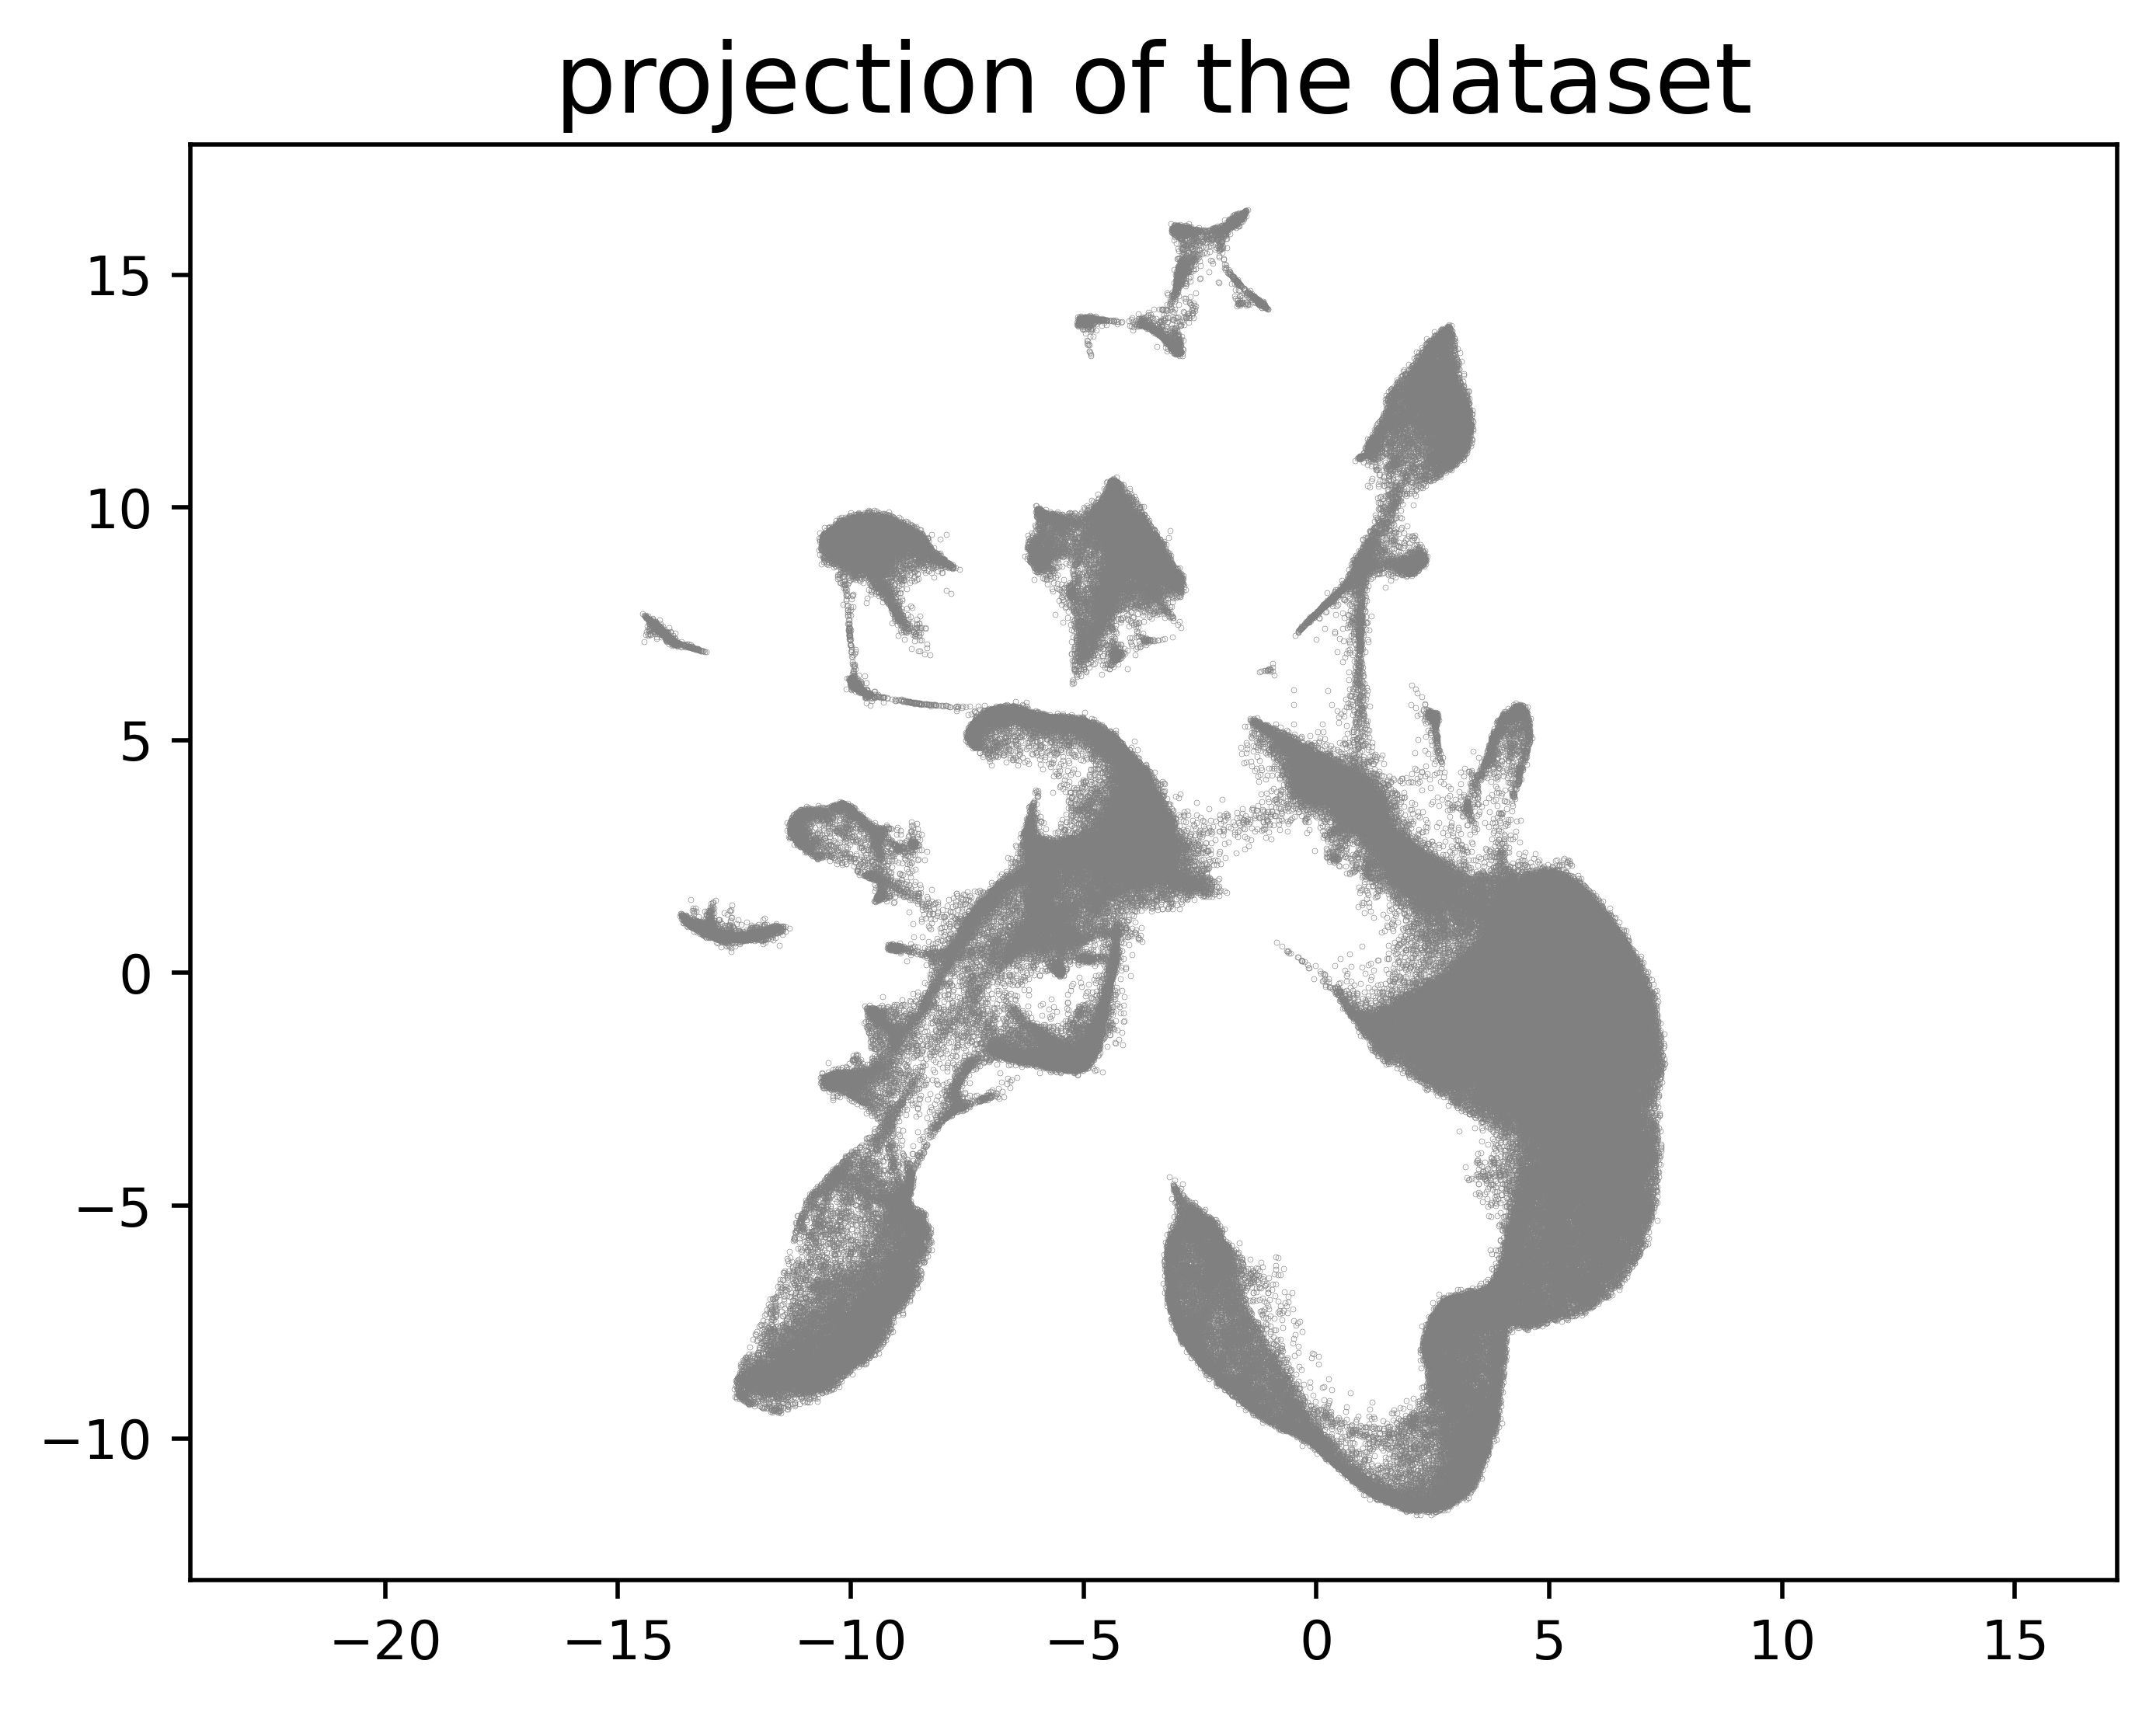

In [22]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['figure.dpi'] = 500
#plt.scatter(X_umap.T[0],X_umap.T[1],  cmap='Spectral', s=.01)
plt.scatter(X_umap.T[0],X_umap.T[1], c='grey',  s=.008)
plt.gca().set_aspect('equal', 'datalim')
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('projection of the dataset', fontsize=18);

In [23]:
# Create a category type list 
import matplotlib.pyplot as plt

def cell_type_group(row, cell_type_group):
    ret_val='other'
    for cat in cell_type_group:
        if cat in row['tissue']:
            ret_val=cat
            break
    return ret_val

cell_type_group_series = obs_df['tissue'].unique()
cell_type_group_list = list(cell_type_group_series)

obs_df['category'] = obs_df.apply(lambda row: cell_type_group(row, cell_type_group_list), axis=1)

colors = {}
cm = plt.get_cmap('gist_rainbow')
for index, group in enumerate(cell_type_group_list):
    color= cm(1.*index/len(cell_type_group_list))
    colors[group]=color

#colors['Unassigned']='#7f7f7f'
#colors['Hypodermis']='#a65728'
#colors 

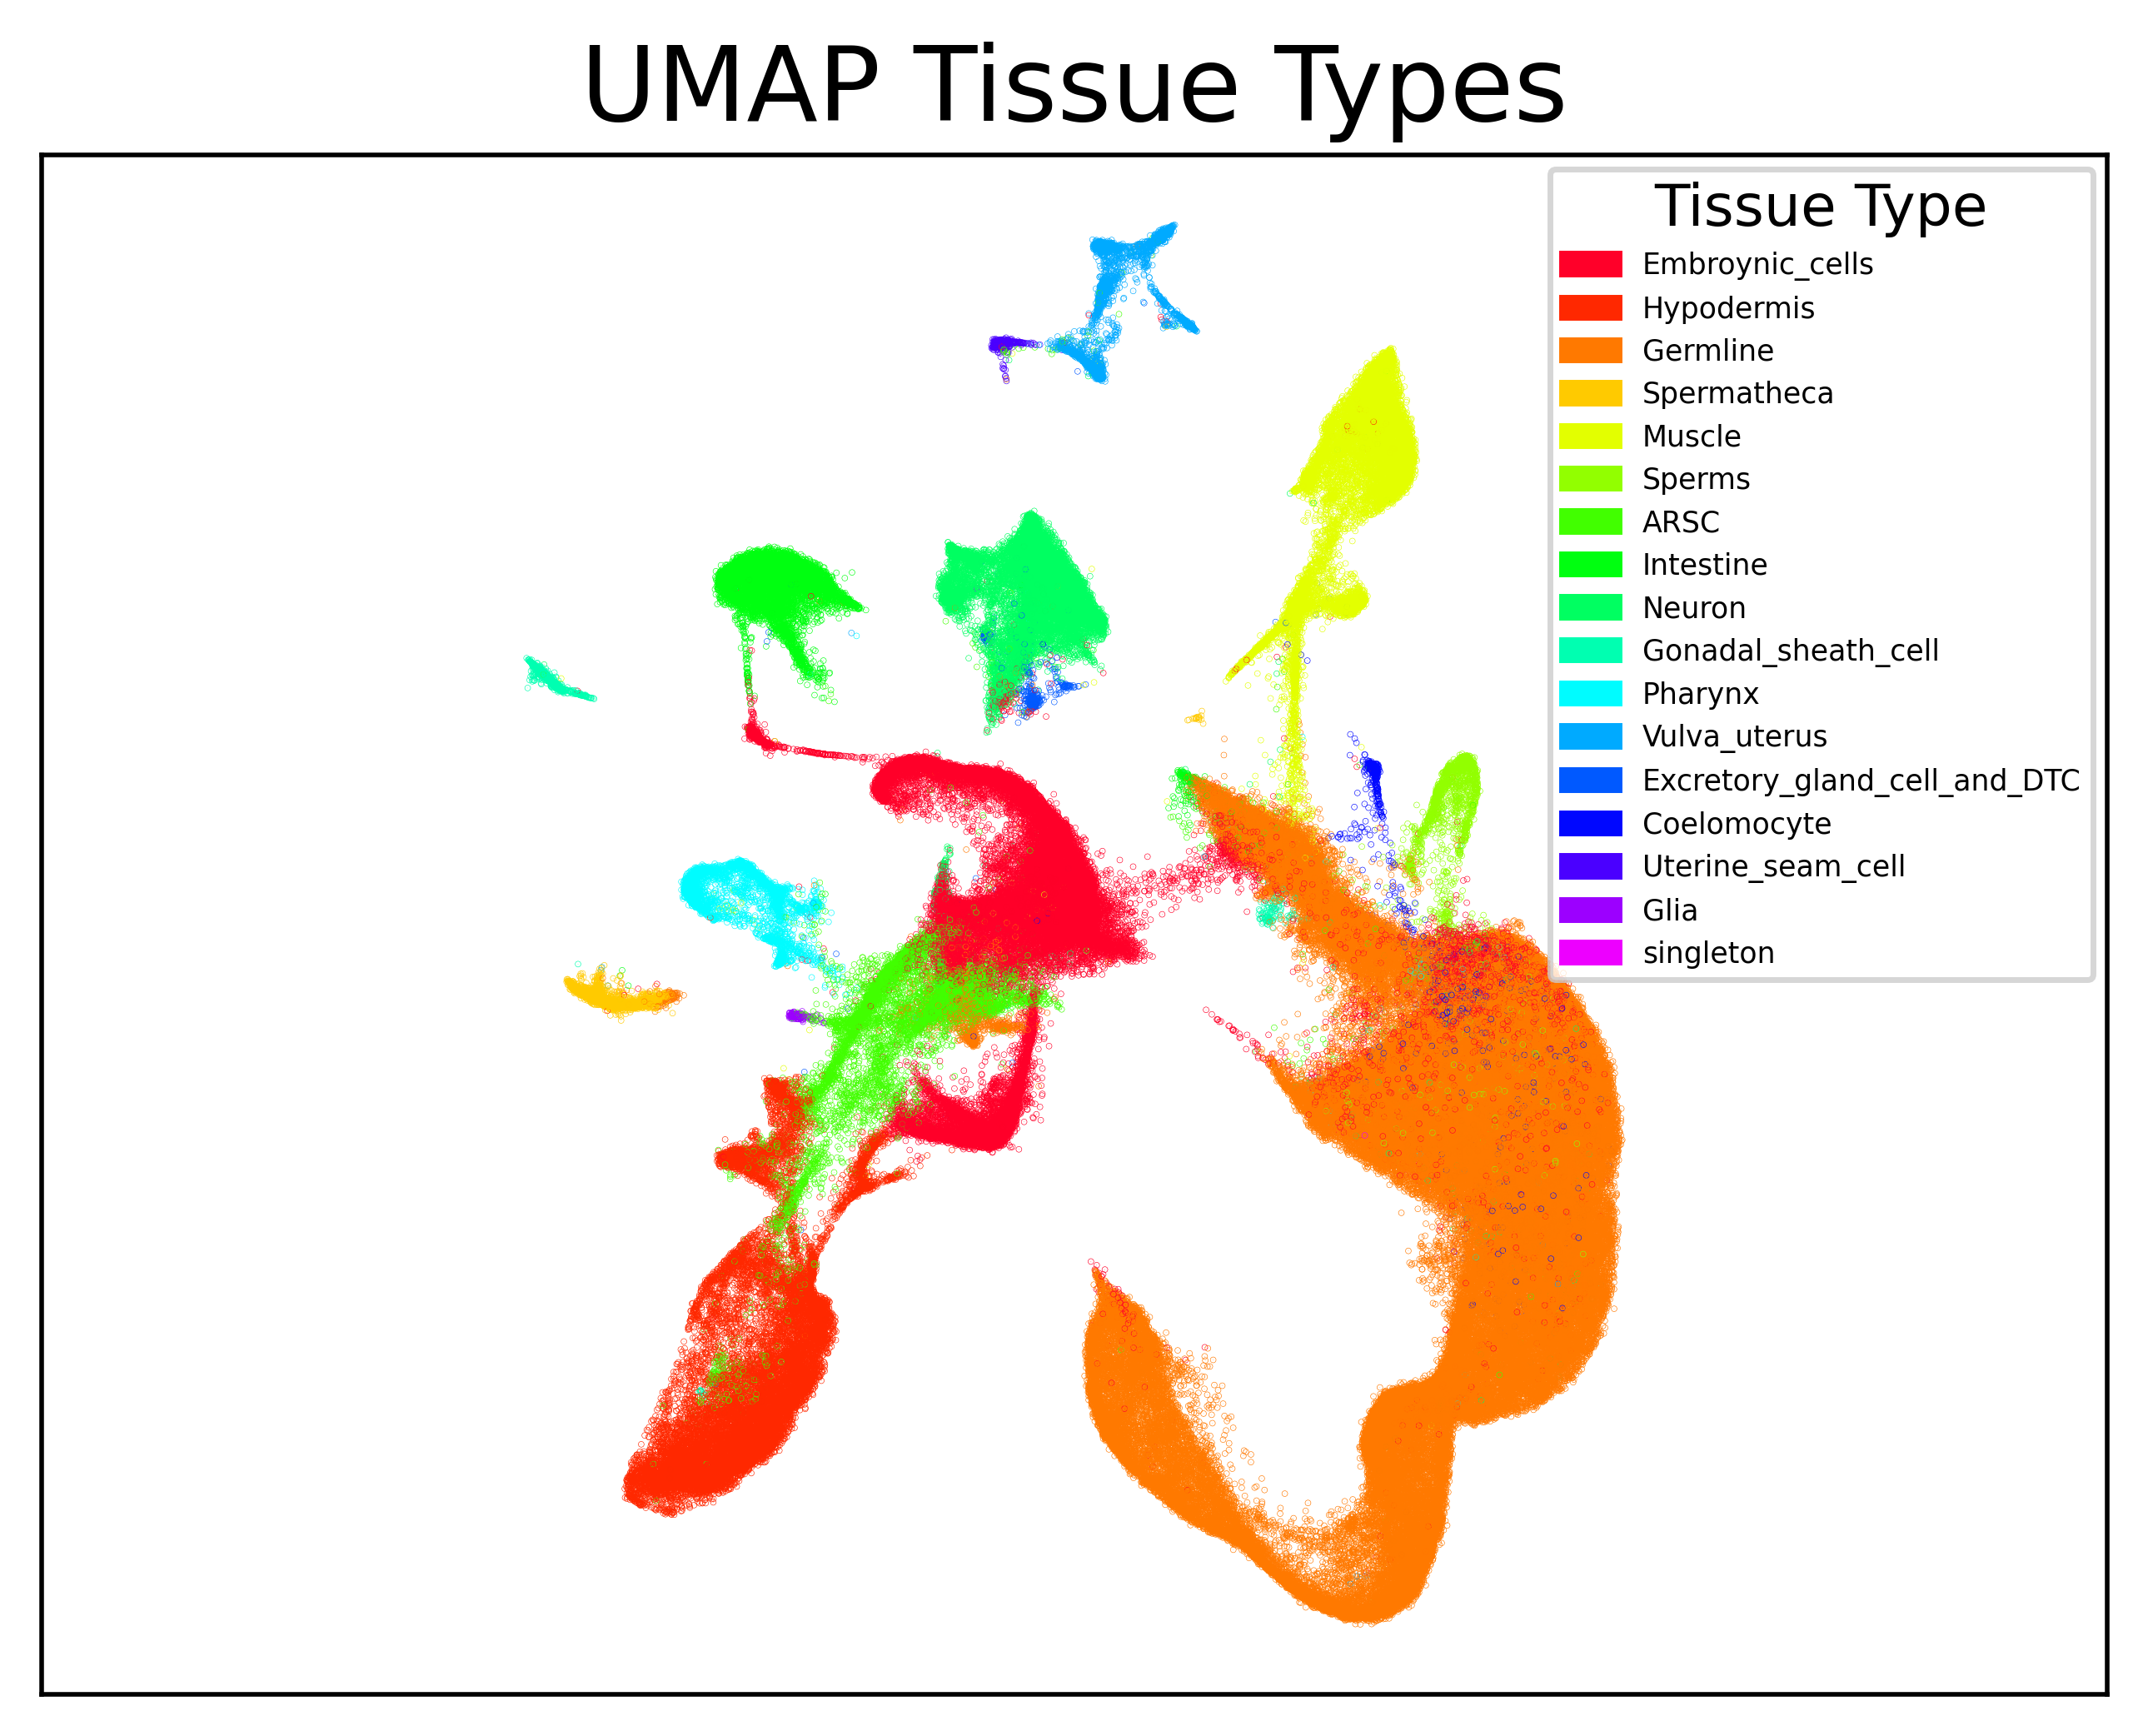

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
%matplotlib inline

# Map the categories from above to the UMAP 
X_umap = adata.obsm['X_umap']
X_umap_df = pd.DataFrame(X_umap, columns = ['X','Y'])

# Add the category to the X_umap_df
obs2_df = obs_df.reset_index(drop=True)
X_umap_df = X_umap_df.join(obs2_df['category'])



####################################

plt.rcParams['figure.dpi'] = 500
sss = plt.scatter(X_umap_df['X'],X_umap_df['Y'], c=X_umap_df['category'].map(colors), s=.008)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP Tissue Types', fontsize=18);
plt.yticks([])
plt.xticks([])

patches = [ mpatches.Patch(color=colors[key], label=key) for key in colors.keys()]
plt.rcParams["legend.fontsize"] = 5
legend = plt.legend(handles=patches)
legend.set_title('Tissue Type')

output_dir='../analysis/wang_lab'
file_name='umap_tissue_types.png'
plt.savefig(f'{output_dir}/{file_name}')

# Check if feature list wormbase ids are in the annotation list


In [26]:
# The RAW DATA GSM7147953_N2D1_GZ/features.tsv.gz contains
# The features and there associated Wormbase_Ids

# The order aligns with the column names in x_df

# https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE229022

import pandas as pd

features_n2d1_df = pd.read_csv(
    "../source_data/wang_lab/GSE229022_RAW/GSM7147953_N2D1_features.tsv.gz",
    sep="\t",
    header=None,
    compression='infer',
    names=['Wormbase_Id', 'features', 'Expression']
)

features_df = adata.var.copy()
features_df['position'] = range(len(features_df))

features_n2d1_df.set_index('features', inplace=True)
features_n2d1_df.drop(columns=['Expression'], inplace=True)

# Join the dataframes to get the Wormbase_Ids
wormbase_ids_as_features = features_df.merge(features_n2d1_df, how='left', left_index=True, right_index=True)

# If an Wormbase ID is not found Replace NaN values in 'Wormbase_Id' with the index values
wormbase_ids_as_features['Wormbase_Id'] = wormbase_ids_as_features['Wormbase_Id'].fillna(pd.Series(wormbase_ids_as_features.index, index=wormbase_ids_as_features.index))

# Preview the result
print(wormbase_ids_as_features.head())

# Counts should be 26,603
print(f"{len(wormbase_ids_as_features):,}")

# Sanity Check
is_unique = wormbase_ids_as_features['Wormbase_Id'].is_unique
print("All Wormbase_Id values are unique:", is_unique)


       features  position     Wormbase_Id
nduo-6   nduo-6         0  WBGene00010957
ndfl-4   ndfl-4         1  WBGene00010958
MTCE.7   MTCE.7         2  WBGene00014454
nduo-1   nduo-1         3  WBGene00010959
atp-6     atp-6         4  WBGene00010960
26,603
All Wormbase_Id values are unique: True


# Appendix

# Convert Seurat data to h5ad

In [2]:
%load_ext rpy2.ipython

import rpy2.robjects as ro
import wormcat3
import sys
print(sys.version)
print(f"Wormcat3 {wormcat3.__version__}")
ro.r('version')

3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 21:00:12) [Clang 16.0.6 ]
Wormcat3 0.1.8


<rpy2.robjects.vectors.ListVector object at 0x1b4718610> [19]
R classes: ('simple.list',)
[StrSexpVe..., StrSexpVe..., StrSexpVe..., StrSexpVe..., ..., StrSexpVe..., StrSexpVe..., StrSexpVe..., StrSexpVe...]
  platform: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x1b5276850> [16]
R classes: ('character',)
['x86_64-apple-darwin13.4.0']
  arch: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x1b483a410> [16]
R classes: ('character',)
['x86_64']
  os: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x1b5277110> [16]
R classes: ('character',)
['darwin13.4.0']
  system: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x1b5277050> [16]
R classes: ('character',)
['x86_64, darwin13.4.0']
...
  major: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x1b5277310> [16]
R classes: ('character',)
['86002']
  minor: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x1b5277210> [16]
R classes: ('character',)
['R']
  year: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x1b5277390> [16]
R classes: ('character',)
['R version 4.3.3 (2024-02-29)']
  month: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x1b5277490> [16]
R classes: ('character',)
['Angel Food Cake']

In [36]:
%%R
R.version.string
packageVersion("base")

[1] ‘4.3.3’


In [3]:
%%R -o seurat_obj
library('Seurat')
rds_file <- file("../source_data/wang_lab/GSE229022_integrated_seurat_revision.rds")
seurat_obj <- readRDS(rds_file)
seurat_obj

R[write to console]: Loading required package: SeuratObject

R[write to console]: Loading required package: sp

R[write to console]: 
Attaching package: ‘SeuratObject’


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, t





    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    An object of class Seurat 
28603 features across 241969 samples within 2 assays 
Active assay: RNA (26603 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 3 dimensional reductions calculated: pca, umap, tsne


In [5]:
%%R
cat("Counts dimensions:      ", dim(seurat_obj@assays$RNA@counts), "\n")
cat("Normalized data dims:   ", dim(seurat_obj@assays$RNA@data), "\n")
cat("Scaled data dimensions: ", dim(seurat_obj@assays$RNA@scale.data), "\n")

Counts dimensions:       26603 241969 
Normalized data dims:    26603 241969 
Scaled data dimensions:  0 0 


In [ ]:
%%R
# Show structure of RNA assay
seurat_obj@assays$RNA@counts

26603 x 241969 sparse Matrix of class "dgCMatrix"


R[write to console]:   [[ suppressing 32 column names ‘LIPL4D1_AAACCCAAGGGTAATT-1’, ‘LIPL4D1_AAACCCACAGAGAGGG-1’, ‘LIPL4D1_AAACCCACAGATCCAT-1’ ... ]]

R[write to console]:   [[ suppressing 32 column names ‘LIPL4D1_AAACCCAAGGGTAATT-1’, ‘LIPL4D1_AAACCCACAGAGAGGG-1’, ‘LIPL4D1_AAACCCACAGATCCAT-1’ ... ]]



                                                                                           
nduo-6      2 .  1  .  . . . .  2 . 1 . 3 .  . . 6 1 .  . 1 . .  . . .  . .  . 2 . 1 ......
ndfl-4      . .  .  .  . . . 1  1 1 . . . .  . . 1 3 .  . . 1 .  . . .  . 1  . . . 1 ......
MTCE.7      . 1  2  .  . . . .  1 . . 1 1 .  . . 2 . .  . 1 . .  1 1 .  . .  . . . . ......
nduo-1      1 .  .  .  . . . .  2 . 1 1 . .  . . 3 . .  . . 1 .  . . .  . .  1 1 1 . ......
atp-6       1 1  1  1  . 1 . .  4 . 1 1 . .  1 . 6 . .  . . 1 .  . . .  1 .  1 4 1 1 ......
nduo-2      3 .  1  .  . . . .  1 . . . . .  . . 1 . .  . . . 1  1 . .  1 .  . 3 1 . ......
ctb-1       1 .  2  .  . . 1 .  3 . 1 . . .  1 1 1 . 1  . . . .  . . .  . .  . 3 . . ......
ctc-3       2 .  3  .  2 1 3 1  6 2 1 2 2 .  1 2 2 2 .  . . . 1  . 1 1  3 .  1 7 . 1 ......
nduo-4      . .  .  .  . . . .  3 . . . 1 .  . . . 1 1  . . . .  . . .  . 1  . 4 . . ......
ctc-1       5 .  2  .  4 2 1 . 13 1 3 . 1 .  3 1 8 . 1  1 . 3 2  . . .  . .  1 4

Exception ignored from cffi callback <function _consolewrite_ex at 0x12fd7aa20>:
Traceback (most recent call last):
  File "/Users/dan/miniforge3/envs/dan-dev-py312-r433/lib/python3.12/site-packages/rpy2/rinterface_lib/callbacks.py", line 136, in _consolewrite_ex
    consolewrite_print(s)
  File "/Users/dan/miniforge3/envs/dan-dev-py312-r433/lib/python3.12/site-packages/rpy2/rinterface_lib/callbacks.py", line 119, in consolewrite_print
    print(s, end='', flush=True)
  File "/Users/dan/miniforge3/envs/dan-dev-py312-r433/lib/python3.12/site-packages/ipykernel/iostream.py", line 609, in flush
    if not evt.wait(self.flush_timeout):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/dan/miniforge3/envs/dan-dev-py312-r433/lib/python3.12/threading.py", line 655, in wait
    signaled = self._cond.wait(timeout)
               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/dan/miniforge3/envs/dan-dev-py312-r433/lib/python3.12/threading.py", line 359, in wait
    gotit = waiter.acquire(True, tim

 . .  . . . . .  . . . .  . . .  . .  . . . . ......
str-161     . .  .  .  . . . .  . . . . . .  . . . . .  . . . .  . . .  . .  . . . . ......
T08B6.4     . .  .  .  . . . .  . . . . . .  . . . . .  . . . .  . . .  . .  . . . . ......
Y9C9A.8     . .  .  .  . . . .  . . . . . .  . . . . .  . . . .  . . .  . .  . . . . ......
fbxa-86     . .  .  .  . . . .  . . . . . .  . . . . .  . . . .  . . .  . .  . . . . ......
str-168     . .  .  .  . . . .  . . . . . .  . . . . .  . . . .  . . .  . .  . . . . ......
str-169     . .  .  .  . . . .  . . . . . .  . . . . .  . . . .  . . .  . .  . . . . ......
str-163     . .  .  .  . . . .  . . . . . .  . . . . .  . . . .  . . .  . .  . . . . ......
str-164     . .  .  .  . . . .  . . . . . .  . . . . .  . . . .  . . .  . .  . . . . ......
txt-3       . .  .  .  . . . .  . . . . . .  . . . . .  . . . .  . . .  . .  . . . . ......
Y9C9A.13    . .  .  .  . . . .  . . . . . .  . . . . .  . . . .  . . .  . .  . . . . ......
srz-27      . .  .  .  . . 

R[write to console]:   [[ suppressing 32 column names ‘LIPL4D1_AAACCCAAGGGTAATT-1’, ‘LIPL4D1_AAACCCACAGAGAGGG-1’, ‘LIPL4D1_AAACCCACAGATCCAT-1’ ... ]]



                                                                                  
Y48A6C.7    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
Y47D3A.33   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
T28D6.t1    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
T28D6.t2    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
Y66D12A.27  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
Y75B8A.51   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
ZK525.8     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
Y73B3A.t1   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
mir-800     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
T04G9.9     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
F56F10.7    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
C05D

In [ ]:
%%R
library(SeuratDisk)
SaveH5Seurat(seurat_obj, filename = "./single_cell_data/seurat_obj.h5Seurat")
Convert("./single_cell_data/seurat_obj.h5Seurat", dest = "h5ad")


In [ ]:
import scanpy as sc

adata = sc.read_10x_mtx("./single_cell_data/GSM7147953_N2D1_GZ/", var_names='gene_symbols', cache=True)
adata
obs_df = adata.obs
obs_df

In [ ]:
from scipy.io import mmread
import pandas as pd

# Load the matrix
matrix = mmread("./single_cell_data/GSM7147953_N2D1/GSM7147953_N2D1_matrix.mtx").tocsc()  # or .tocsr() depending on your use

# matrix is a sparse matrix. You can convert it to dense (careful with memory)
dense_matrix = matrix.toarray()

# Optional: Load features and barcodes if available
features = pd.read_csv("./single_cell_data/GSM7147953_N2D1/GSM7147953_N2D1_features.tsv", sep="\t", header=None)
barcodes = pd.read_csv("./single_cell_data/GSM7147953_N2D1/GSM7147953_N2D1_barcodes.tsv", sep="\t", header=None)